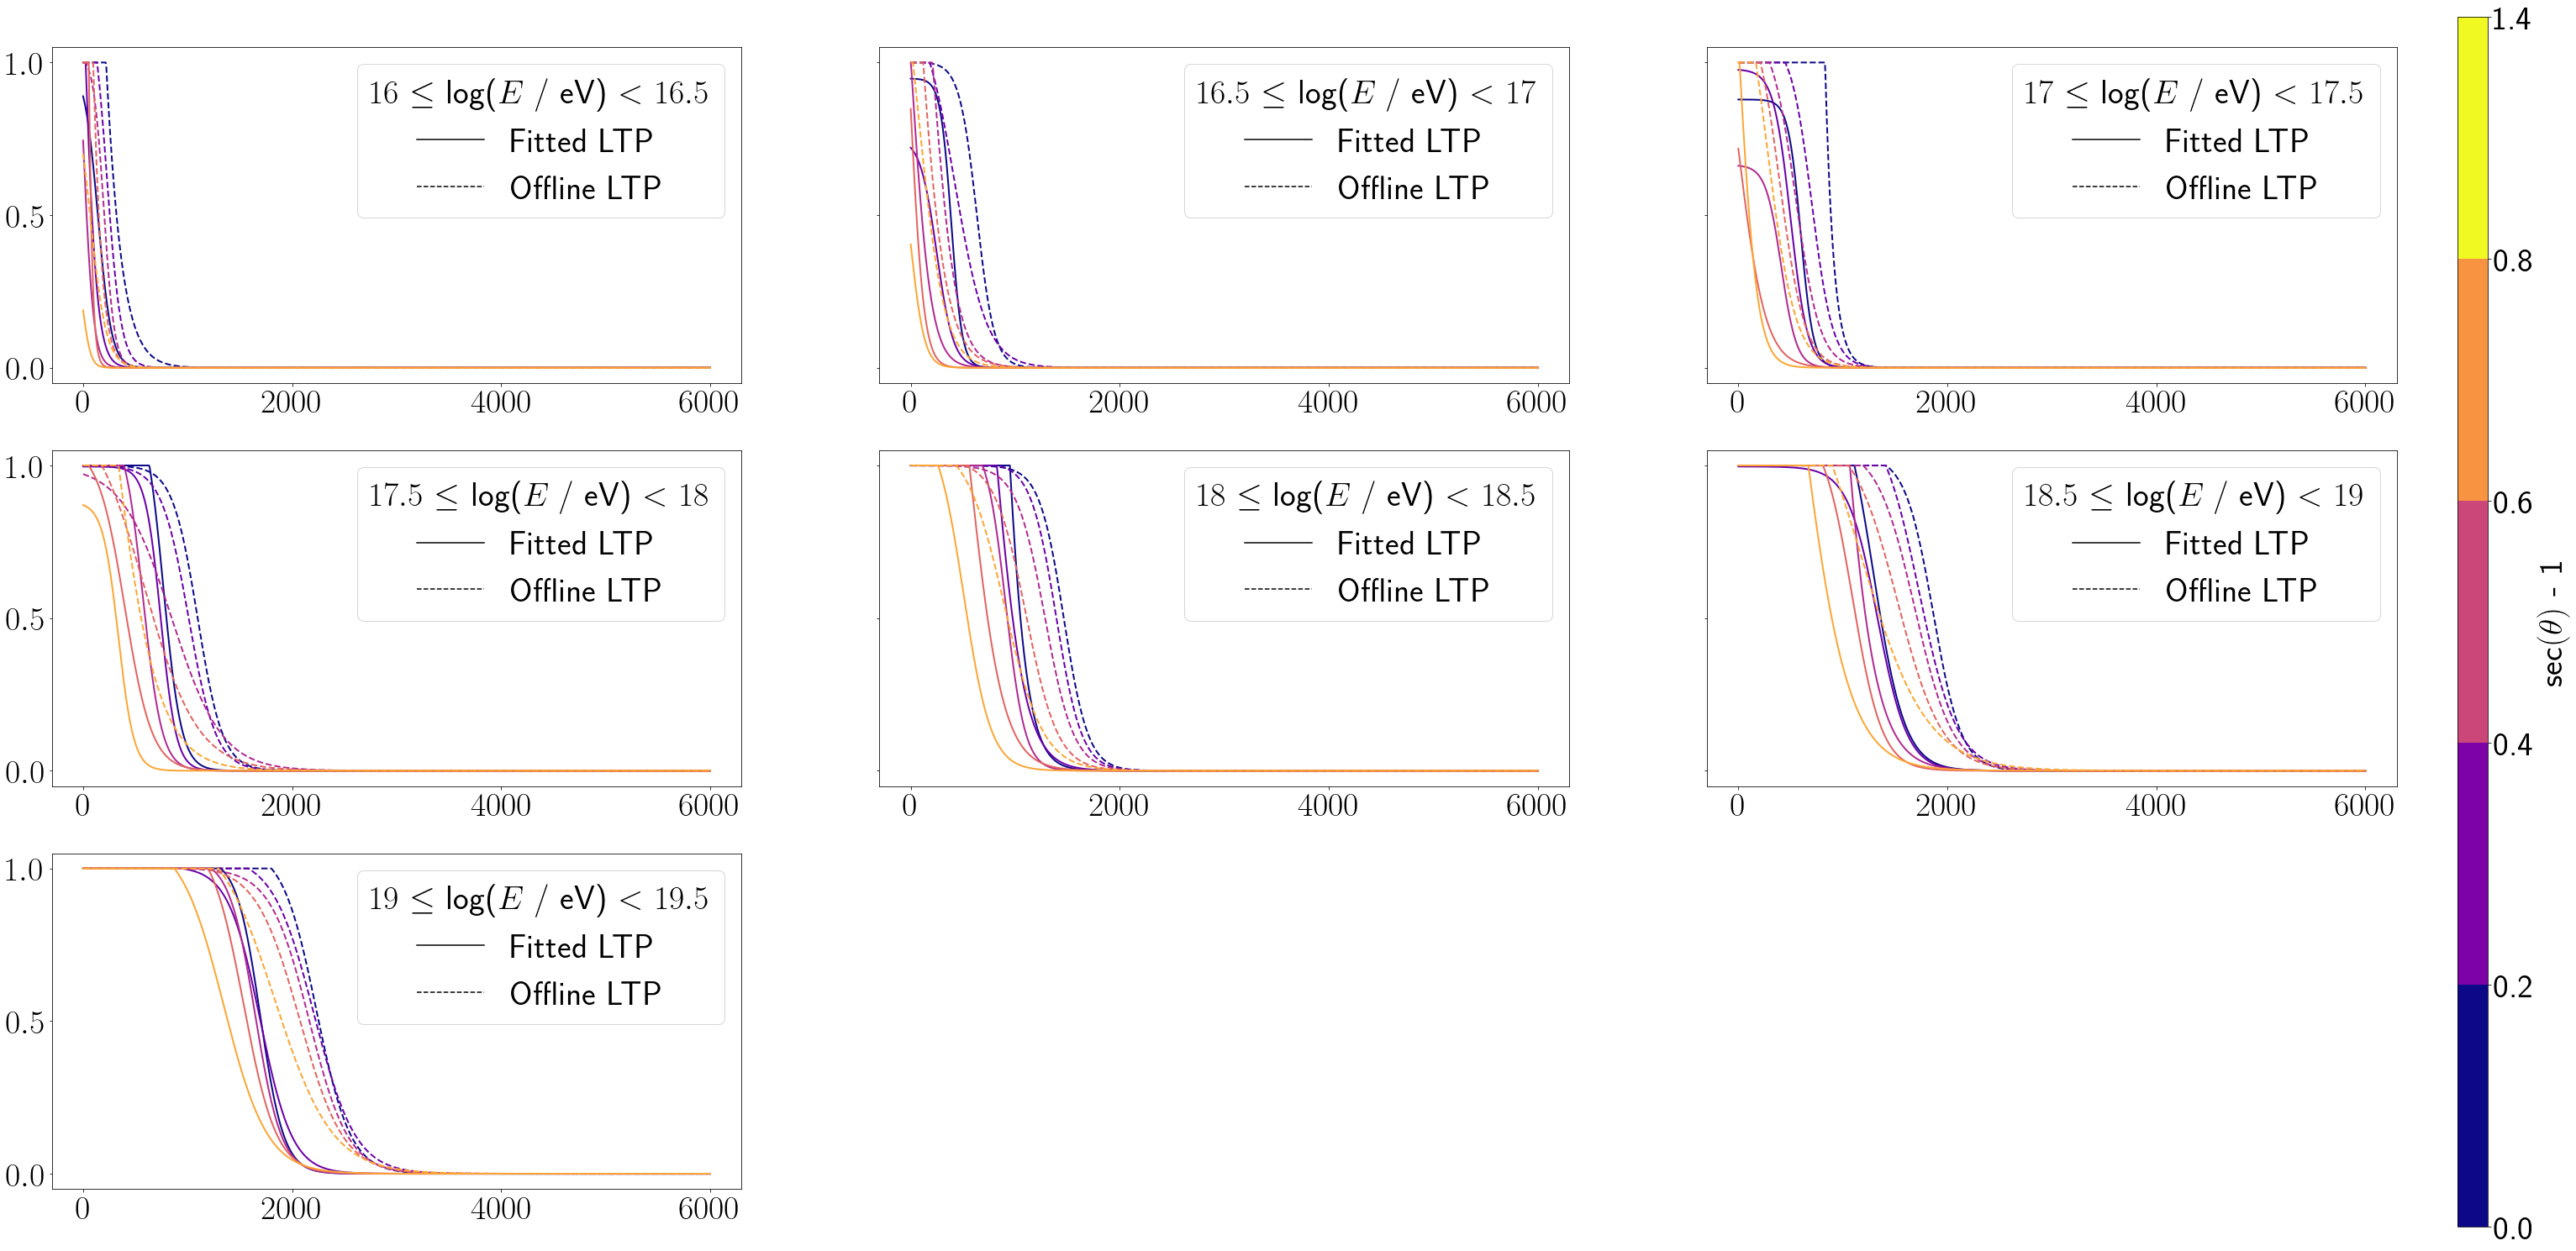

In [1]:
from Binaries import *

fig, axes = plt.subplots(3,3, sharex = False, sharey = True, figsize = [50, 25])
axes[-1][-1].axis("off"), axes[-1][-2].axis("off")

e_labels = [r"$16$", r"$16.5$", r"$17$", r"$17.5$", r"$18$", r"$18.5$", r"$19$", r"$19.5$"]            
annotate = lambda e : e_labels[e] + r" $\leq$ log($E$ / eV) $<$ " + e_labels[e + 1]
theta_bins =  [0.0000, 33.5600, 44.4200, 51.3200, 56.2500, 65.3700]

colormap = cmap.get_cmap("plasma")

for e in range(len(e_labels) - 1):

    ax = axes[e // 3][e % 3]

    ax.plot([], [], color = "k", ls = "solid", label = "Fitted LTP")
    ax.plot([], [], color = "k", ls = "--", label = "Offline LTP")
    # ax.plot([], [], color = "k", ls = ":", label = "Offline LDF")

    ax.legend(title = annotate(e))

    for t in range(len(theta_bins) - 1):

        c = colormap(t / (len(theta_bins) - 1))
        fitfunc_Offline_LDF, _ = get_fit_function("/cr/data01/filip/models/HardwareClassifier/ROC_curve/full_random_traces_downsampled_vem_1.000/", e, t)
        fitfunc_Offline_LTP, _ = get_fit_function("/cr/tempdata01/filip/QGSJET-II/LTP/", e, t)
        fitfunc_Own_LTP, _     = get_fit_function("/cr/data01/filip/models/HardwareClassifier/ROC_curve/full_random_traces_downsampled_low_spd_extended/", e, t)

        X = np.linspace(0, 6000, 1000)


        ax.plot(X, fitfunc_Offline_LDF(X), color = c, ls = "solid", lw = 2)
        ax.plot(X, fitfunc_Offline_LTP(X), color = c, ls = "--", lw = 2)
        # ax.plot(X, fitfunc_Own_LTP(X), color = c, ls = "solid", lw = 2)

norm = BoundaryNorm(theta_bins, colormap.N)
ax2 = fig.add_axes([0.92, 0.1, 0.01, 0.8])
cbar = ColorbarBase(ax2, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
cbar.set_ticks(theta_bins)
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])

# plt.subplots_adjust(hspace = 0.04, wspace = 0)



Classifier                                    Dataset                                  TP      FP      TN      FN
HardwareClassifier                            full_random_traces_downsampled...    176394       0       0 1827324 -> ACC =   8.80%
HardwareClassifier                            per_trace_prediction                  89144       0       0  156908 -> ACC =  36.23%


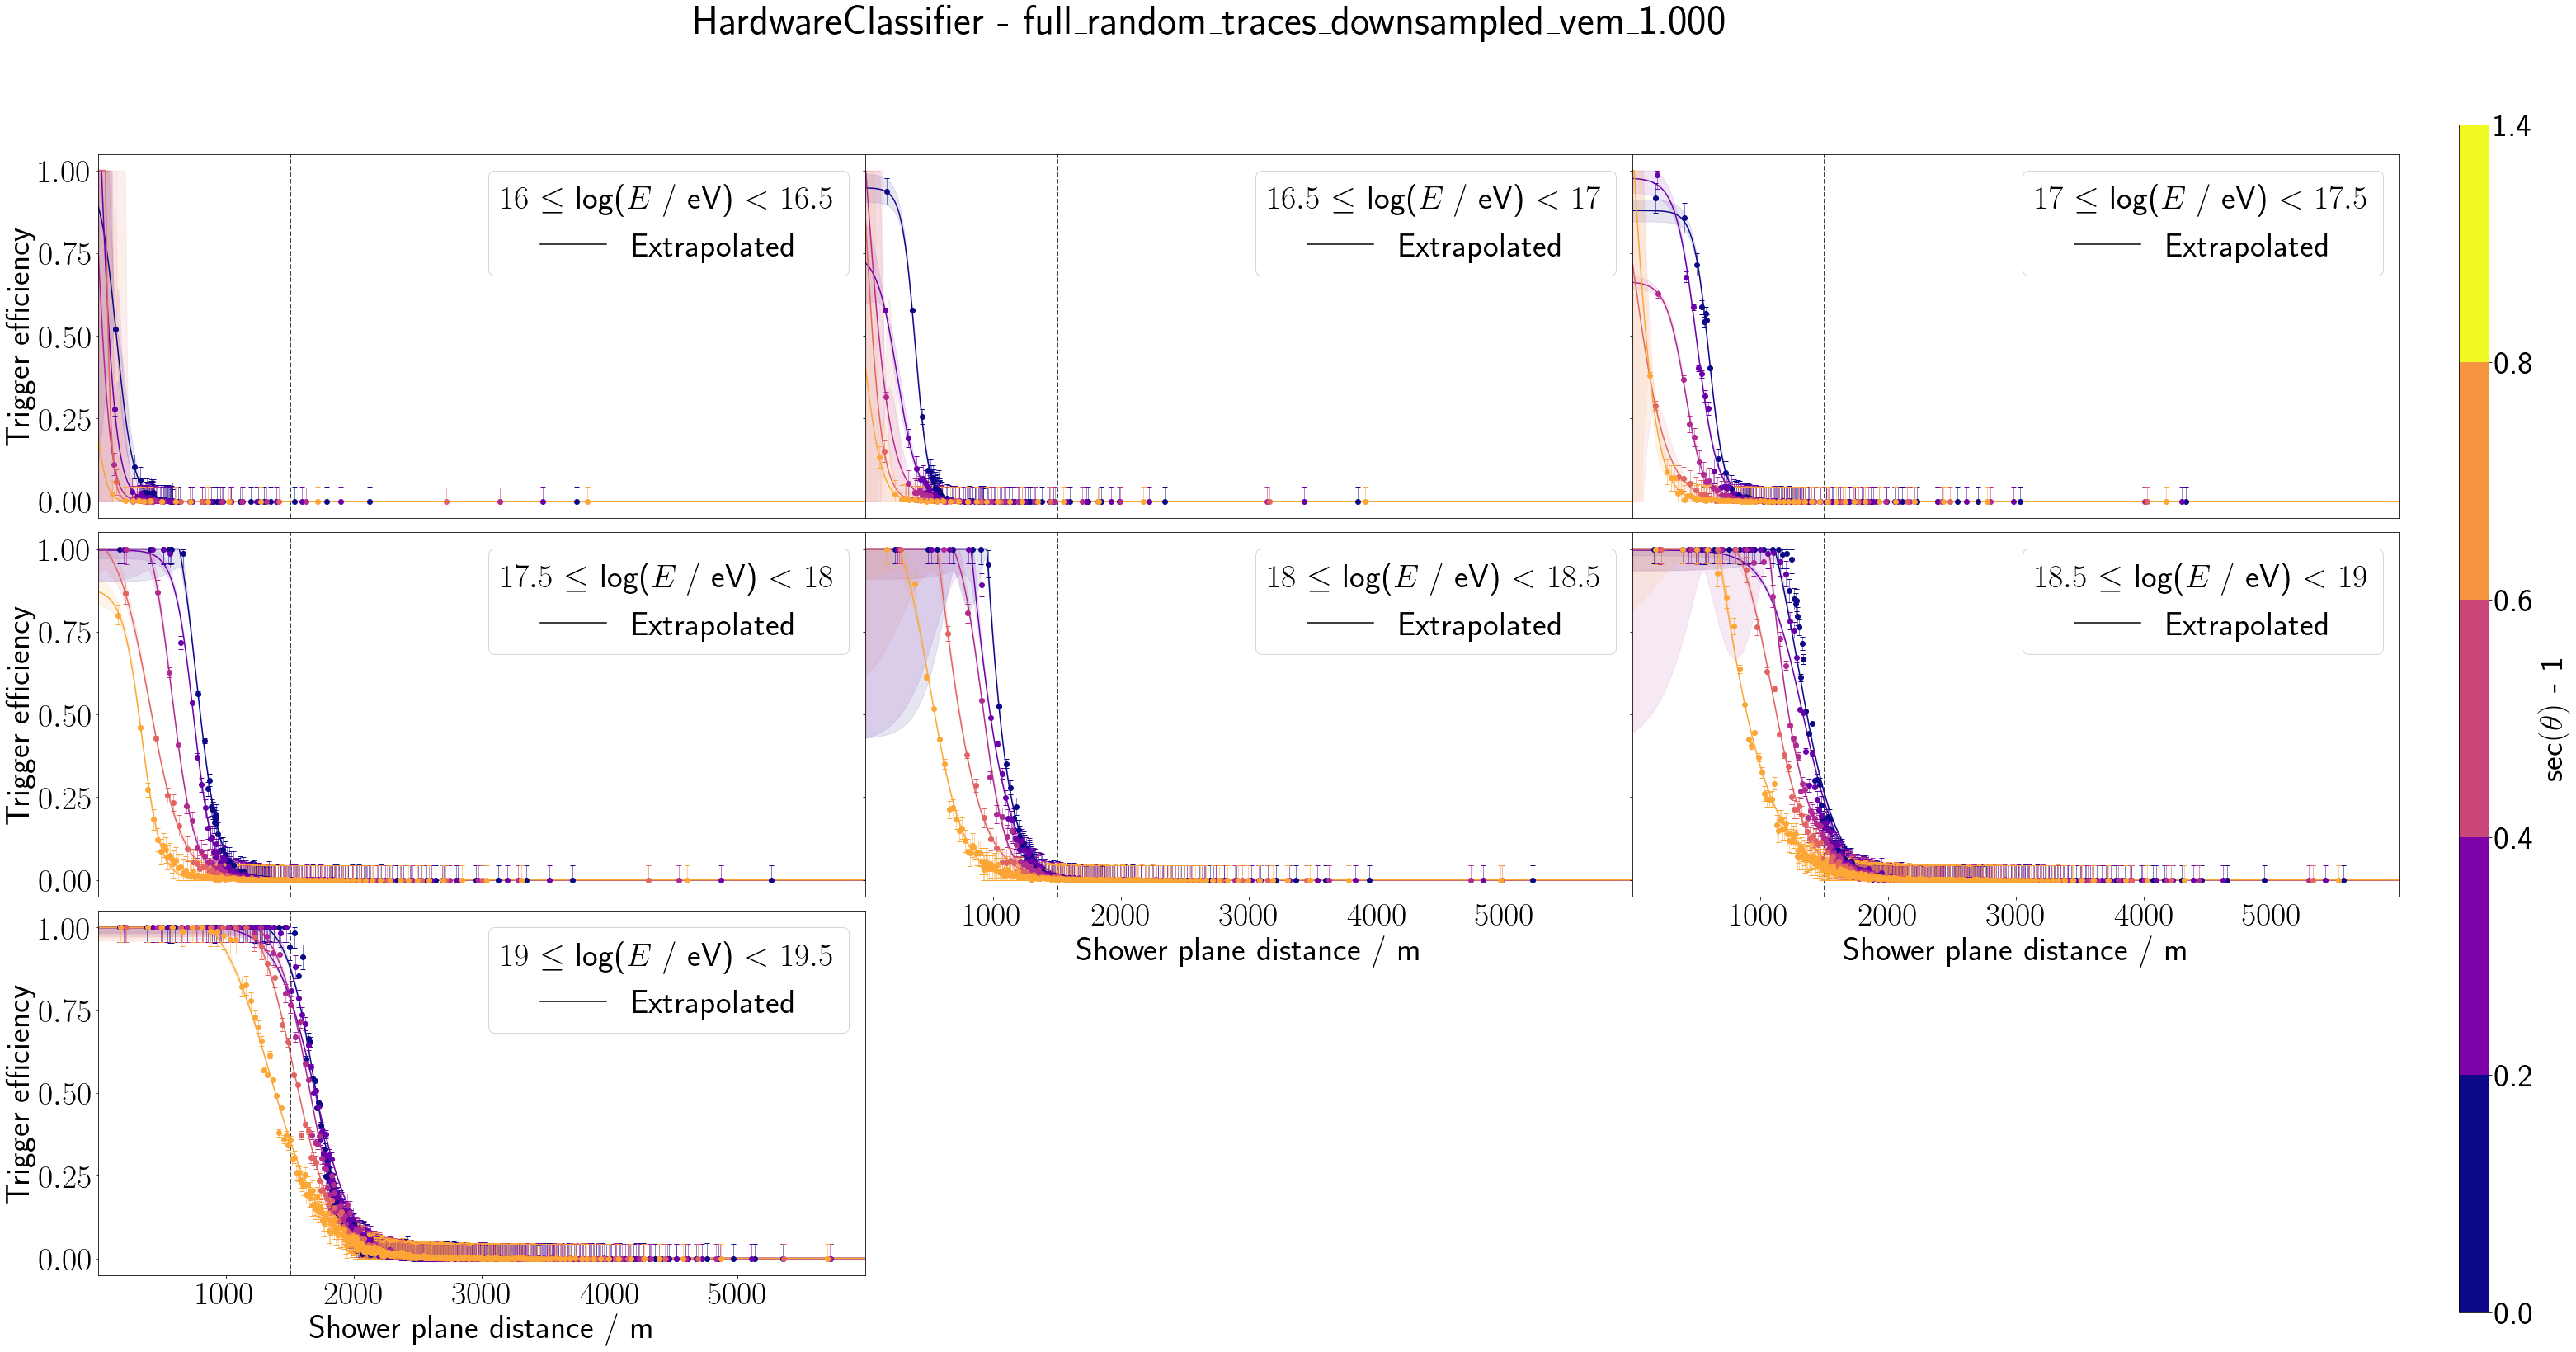

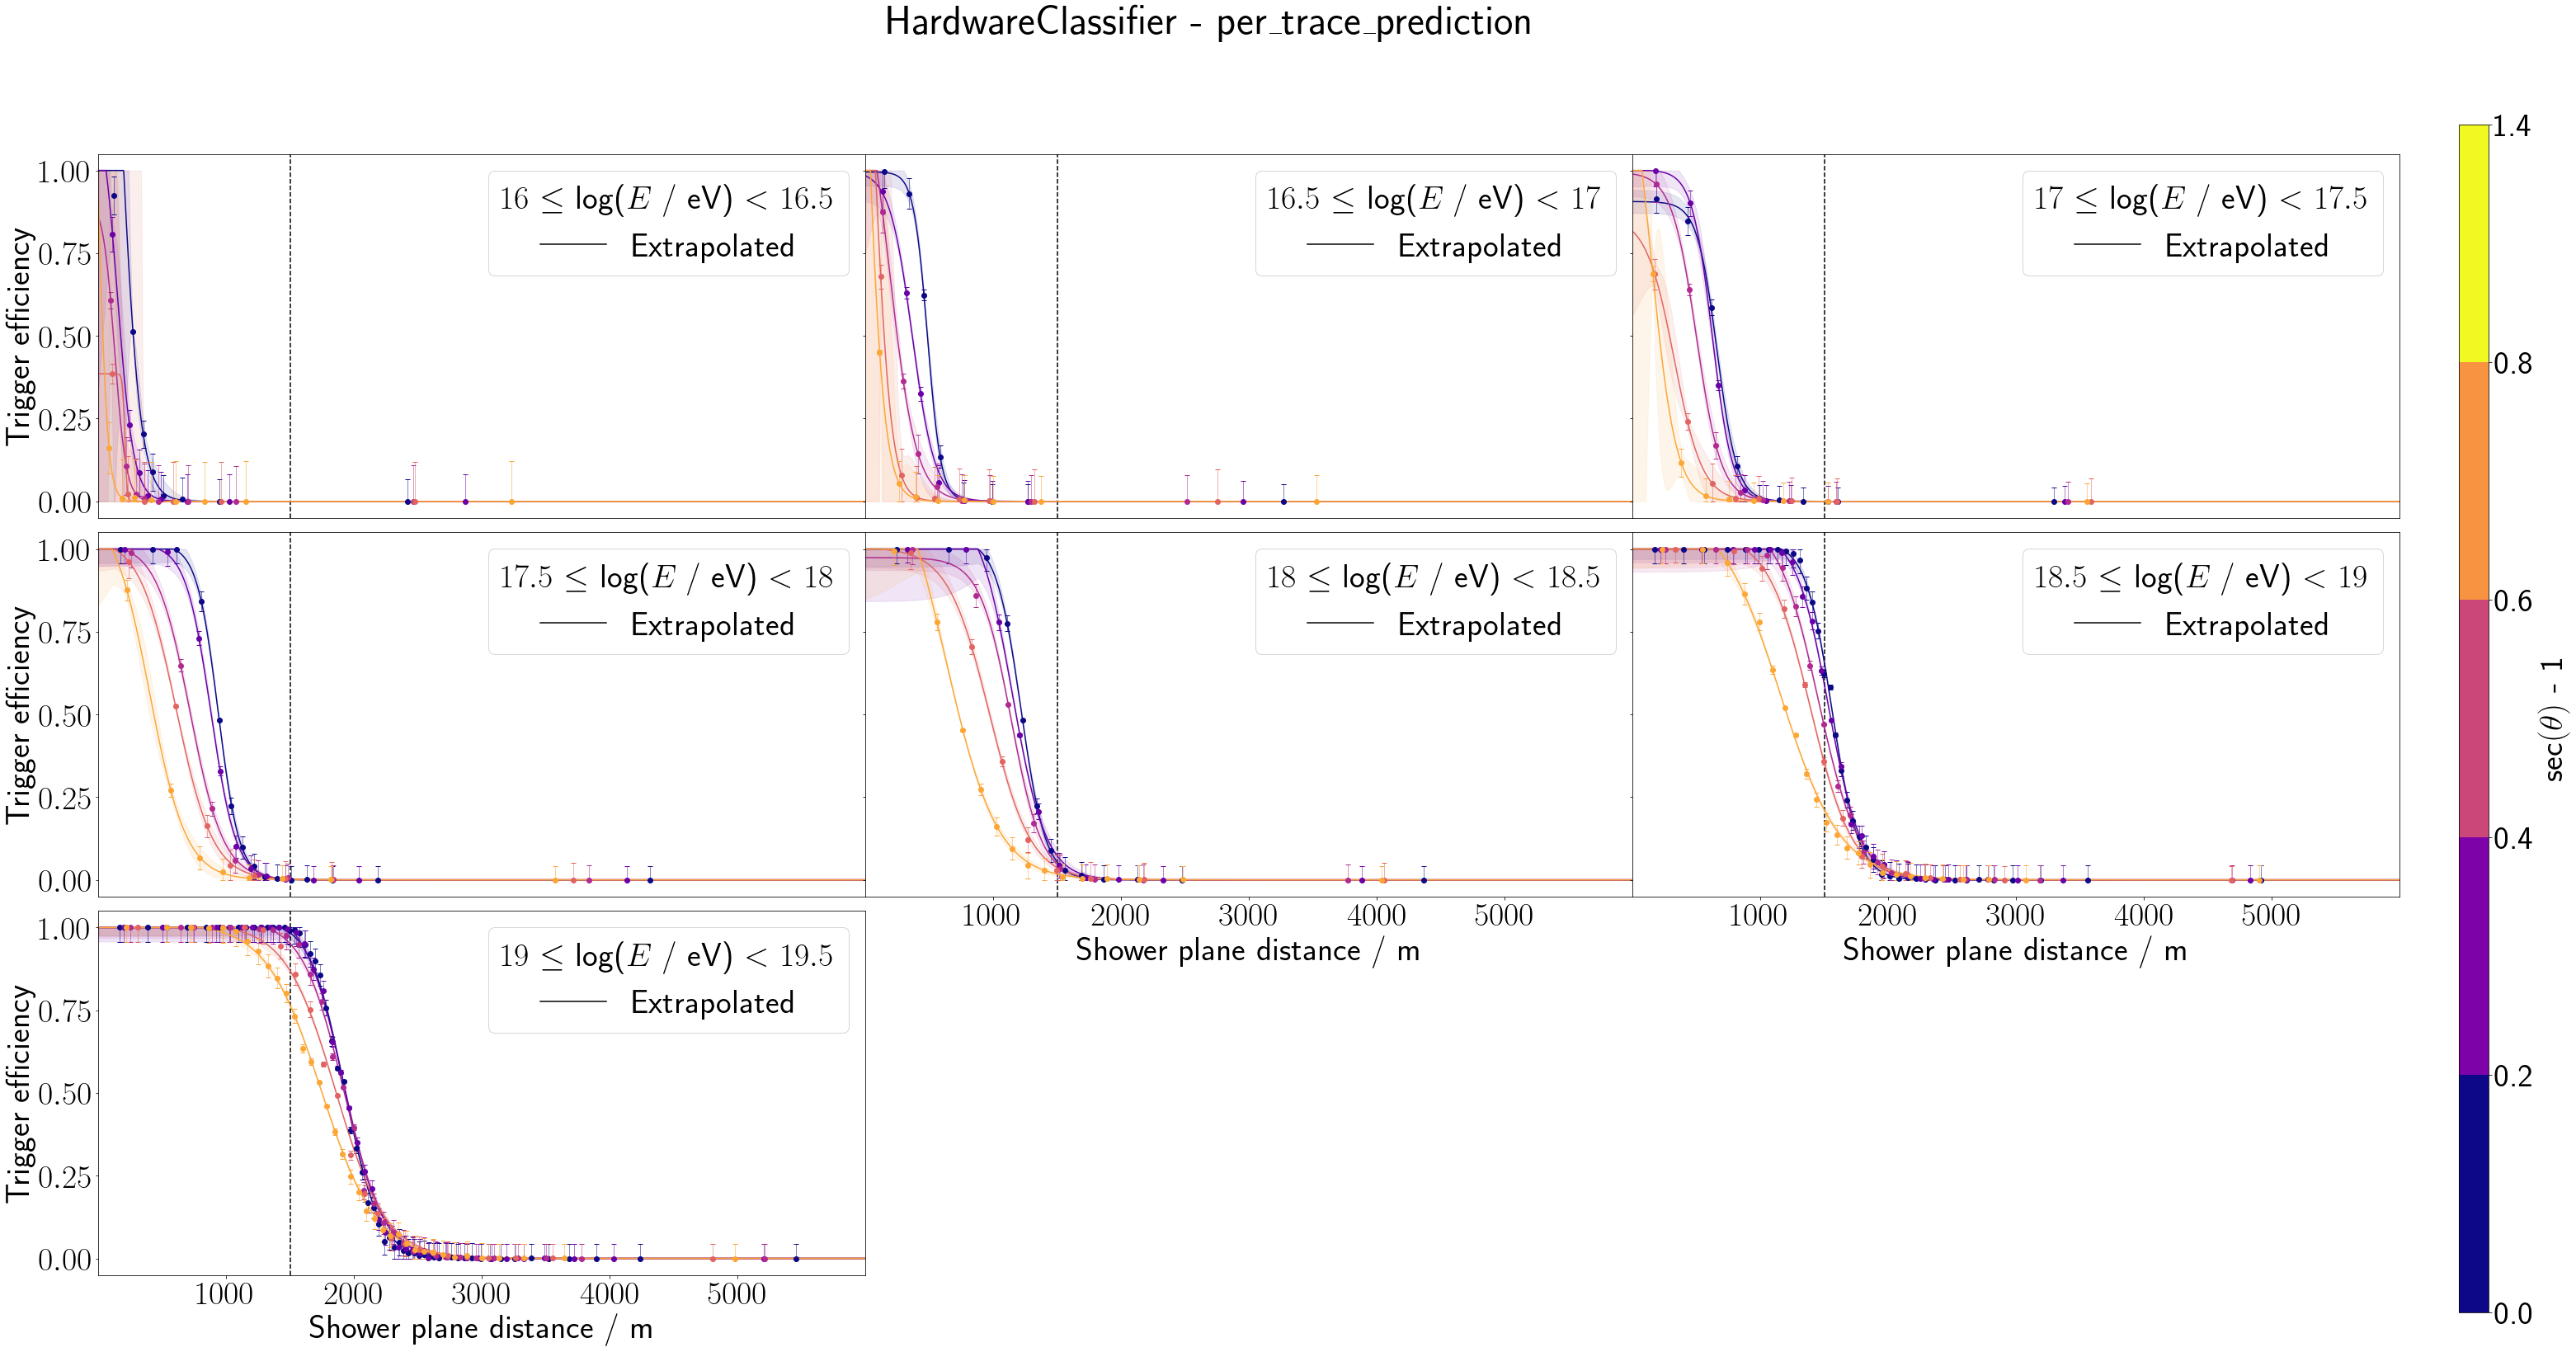

In [1]:
from Binaries import *

Trigger = HardwareClassifier()

Trigger.spd_energy_efficiency("full_random_traces_downsampled_vem_1.000")
Trigger.spd_energy_efficiency("per_trace_prediction")